In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset
df = pd.read_csv('train.csv')
df.head()

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,DepartureScheduled,ArrivalScheduled,BlockTimeScheduled,Adults,Children,Freight,Infants,Bags,TeledyneRampWeight
0,181142302,221,SPRZK,197.0,Max,Scheduled Flight,FR,Ryanair Sun,EMA-BUD,2022-01-24 09:55:00,2022-01-24 12:30:00,155.0,112.0,6.0,0.0,2.0,43.0,62075.0
1,178908306,3373,9HQEC,189.0,NG,Scheduled Flight,FR,Malta Air,TRN-MLA,2020-03-09 09:00:00,2020-03-09 11:00:00,120.0,18.0,0.0,0.0,0.0,7.0,62002.0
2,178886981,2814,9HQCN,189.0,NG,Scheduled Flight,FR,Malta Air,STN-CGN,2020-01-06 07:35:00,2020-01-06 08:50:00,75.0,126.0,5.0,0.0,0.0,19.0,58029.0
3,180538798,6893,SPRKP,189.0,NG,Scheduled Flight,FR,Ryanair Sun,DTM-KTW,2020-12-11 07:15:00,2020-12-11 08:45:00,90.0,84.0,5.0,0.0,1.0,8.0,56070.0
4,178863684,2156,EIDWJ,189.0,NG,Scheduled Flight,FR,Ryanair DAC,BHX-AGP,2020-02-07 15:20:00,2020-02-07 18:05:00,165.0,175.0,2.0,0.0,0.0,47.0,68315.0


/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_56080/1500028600.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TeledyneRampWeight'])


<AxesSubplot:xlabel='TeledyneRampWeight', ylabel='Density'>

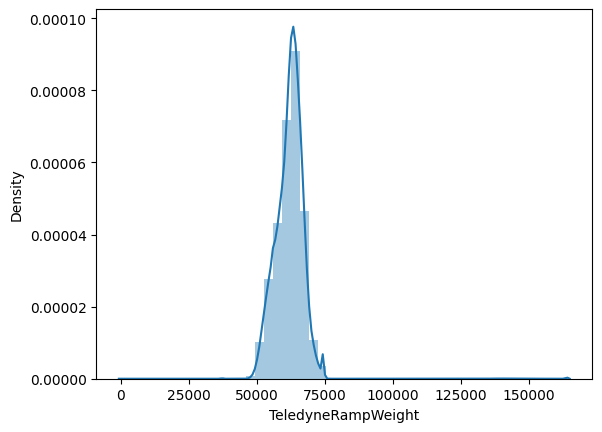

In [3]:
#Plot distribution of target variable: TeledyneRampWeight
sns.distplot(df['TeledyneRampWeight'])

From the histogram of the target variable, we see that the bulk of the distribution is within 50000 and 75000 with most outliers on the right, or the upper range of 75000

In [4]:
df.dtypes

FlightID                  int64
FlightNumber              int64
AircraftRegistration     object
AircraftCapacity        float64
AircraftTypeGroup        object
ServiceDescription       object
Carrier                  object
AOCDescription           object
ScheduledRoute           object
DepartureScheduled       object
ArrivalScheduled         object
BlockTimeScheduled      float64
Adults                  float64
Children                float64
Freight                 float64
Infants                 float64
Bags                    float64
TeledyneRampWeight      float64
dtype: object

## Adding and modifying features for better EDA
Rudimentary EDA done with Pandas Profiling (attached)

In [5]:
#Convert DepartureScheduled to datetime
df['DepartureScheduled'] = pd.to_datetime(df['DepartureScheduled'])

In [6]:
#Split DepartureScheduled into day, month, year, and time
df['DepartureDay'] = df['DepartureScheduled'].dt.day
df['DepartureMonth'] = df['DepartureScheduled'].dt.month
df['DepartureYear'] = df['DepartureScheduled'].dt.year
df['DepartureTime'] = df['DepartureScheduled'].dt.time

In [7]:
#Map DepartureTime to 4 categories: Morning, Afternoon/Evening, Night, Late Night/Early Morning
def time_of_day(time):
    if time >= 6 and time < 12:
        return 'Morning'
    elif time >= 12 and time < 18:
        return 'Afternoon/Evening'
    elif time >= 18 and time < 24:
        return 'Night'
    else:
        return 'Late Night/Early Morning'
df['DepartureTimeOfDay'] = df['DepartureScheduled'].dt.hour.map(time_of_day)
df.head()

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,DepartureScheduled,...,Children,Freight,Infants,Bags,TeledyneRampWeight,DepartureDay,DepartureMonth,DepartureYear,DepartureTime,DepartureTimeOfDay
0,181142302,221,SPRZK,197.0,Max,Scheduled Flight,FR,Ryanair Sun,EMA-BUD,2022-01-24 09:55:00,...,6.0,0.0,2.0,43.0,62075.0,24,1,2022,09:55:00,Morning
1,178908306,3373,9HQEC,189.0,NG,Scheduled Flight,FR,Malta Air,TRN-MLA,2020-03-09 09:00:00,...,0.0,0.0,0.0,7.0,62002.0,9,3,2020,09:00:00,Morning
2,178886981,2814,9HQCN,189.0,NG,Scheduled Flight,FR,Malta Air,STN-CGN,2020-01-06 07:35:00,...,5.0,0.0,0.0,19.0,58029.0,6,1,2020,07:35:00,Morning
3,180538798,6893,SPRKP,189.0,NG,Scheduled Flight,FR,Ryanair Sun,DTM-KTW,2020-12-11 07:15:00,...,5.0,0.0,1.0,8.0,56070.0,11,12,2020,07:15:00,Morning
4,178863684,2156,EIDWJ,189.0,NG,Scheduled Flight,FR,Ryanair DAC,BHX-AGP,2020-02-07 15:20:00,...,2.0,0.0,0.0,47.0,68315.0,7,2,2020,15:20:00,Afternoon/Evening


In [8]:
#Map DepartureDay to 2 categories: Weekday, Weekend
def day_of_week(day):
    if day >= 1 and day <= 5:
        return 'Weekday'
    else:
        return 'Weekend'
df['DepartureDay_cat'] = df['DepartureDay'].map(day_of_week)
df.head()

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,DepartureScheduled,...,Freight,Infants,Bags,TeledyneRampWeight,DepartureDay,DepartureMonth,DepartureYear,DepartureTime,DepartureTimeOfDay,DepartureDay_cat
0,181142302,221,SPRZK,197.0,Max,Scheduled Flight,FR,Ryanair Sun,EMA-BUD,2022-01-24 09:55:00,...,0.0,2.0,43.0,62075.0,24,1,2022,09:55:00,Morning,Weekend
1,178908306,3373,9HQEC,189.0,NG,Scheduled Flight,FR,Malta Air,TRN-MLA,2020-03-09 09:00:00,...,0.0,0.0,7.0,62002.0,9,3,2020,09:00:00,Morning,Weekend
2,178886981,2814,9HQCN,189.0,NG,Scheduled Flight,FR,Malta Air,STN-CGN,2020-01-06 07:35:00,...,0.0,0.0,19.0,58029.0,6,1,2020,07:35:00,Morning,Weekend
3,180538798,6893,SPRKP,189.0,NG,Scheduled Flight,FR,Ryanair Sun,DTM-KTW,2020-12-11 07:15:00,...,0.0,1.0,8.0,56070.0,11,12,2020,07:15:00,Morning,Weekend
4,178863684,2156,EIDWJ,189.0,NG,Scheduled Flight,FR,Ryanair DAC,BHX-AGP,2020-02-07 15:20:00,...,0.0,0.0,47.0,68315.0,7,2,2020,15:20:00,Afternoon/Evening,Weekend


In [9]:
#Map DepartureMonth to 4 categories: Winter (Dec, Jan, Feb), Spring (Mar, Apr, May), Summer (Jun, Jul, Aug) and, Autumn (Sep, Oct, Nov)
def month_of_year(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
df['DepartureMonth_cat'] = df['DepartureMonth'].map(month_of_year)
df.head()

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,DepartureScheduled,...,Infants,Bags,TeledyneRampWeight,DepartureDay,DepartureMonth,DepartureYear,DepartureTime,DepartureTimeOfDay,DepartureDay_cat,DepartureMonth_cat
0,181142302,221,SPRZK,197.0,Max,Scheduled Flight,FR,Ryanair Sun,EMA-BUD,2022-01-24 09:55:00,...,2.0,43.0,62075.0,24,1,2022,09:55:00,Morning,Weekend,Winter
1,178908306,3373,9HQEC,189.0,NG,Scheduled Flight,FR,Malta Air,TRN-MLA,2020-03-09 09:00:00,...,0.0,7.0,62002.0,9,3,2020,09:00:00,Morning,Weekend,Spring
2,178886981,2814,9HQCN,189.0,NG,Scheduled Flight,FR,Malta Air,STN-CGN,2020-01-06 07:35:00,...,0.0,19.0,58029.0,6,1,2020,07:35:00,Morning,Weekend,Winter
3,180538798,6893,SPRKP,189.0,NG,Scheduled Flight,FR,Ryanair Sun,DTM-KTW,2020-12-11 07:15:00,...,1.0,8.0,56070.0,11,12,2020,07:15:00,Morning,Weekend,Winter
4,178863684,2156,EIDWJ,189.0,NG,Scheduled Flight,FR,Ryanair DAC,BHX-AGP,2020-02-07 15:20:00,...,0.0,47.0,68315.0,7,2,2020,15:20:00,Afternoon/Evening,Weekend,Winter


#### Since we can't use data from train_extended, we get average weights from this EASA report https://www.easa.europa.eu/en/downloads/3861/en
The adult weights account for weight of infants and carry-on bags
Bag weight has been considered different for infants, children, and adults
As per report, weights also vary slightly by season due to change in proportion of female passengers wrt male passengers. Even if overall weights have increased in 2022, we can assume they would have changed at a constant rate so shouldn't make much difference for this prediction exercise

In [10]:
#Create weights according to DepartureMonth_cat

#Adults, Children, and Infants
#Infants weight accounted for in average adult weight

if (df['DepartureMonth_cat']=='Summer').all():
    df['Adults_wt'] = df['Adults']*80.8
    df['Children_wt'] = df['Children']*33

    if (df['Children'] == 0).all():
        if (df['Infants'] == 0).all():
            df['Bags_wt'] = df['Bags']*16.94
        else:
            df['Bags_wt'] = ((df['Adults']/(df['Adults']+df['Infants']))*df['Bags']*16.94)+ ((df['Infants']/(df['Adults']+df['Infants']))*df['Bags']*18.33)
    else:
        if (df['Infants'] == 0).all():
            df['Bags_wt'] = ((df['Adults']/(df['Adults']+df['Children']))*df['Bags']*16.94)+ ((df['Children']/(df['Adults']+df['Children']))*df['Bags']*14.2)
        else:
            df['Bags_wt'] = ((df['Adults']/(df['Adults']+df['Children']+df['Infants']))*df['Bags']*16.94)+ ((df['Children']/(df['Adults']+df['Children']+df['Infants']))*df['Bags']*14.2)+ ((df['Infants']/(df['Adults']+df['Children']+df['Infants']))*df['Bags']*18.33)

elif (df['DepartureMonth_cat']=='Winter').all():
    df['Adults_wt'] = df['Adults']*86.6
    df['Children_wt'] = df['Children']*32

    if (df['Children'] == 0).all():
        if df['Infants'] == 0:
            df['Bags_wt'] = df['Bags']*16.37
        else:
            df['Bags_wt'] = ((df['Adults']/(df['Adults']+df['Infants']))*df['Bags']*16.37)+ ((df['Infants']/(df['Adults']+df['Infants']))*df['Bags']*19.13)
    else:
        if (df['Infants'] == 0).all():
            df['Bags_wt'] = ((df['Adults']/(df['Adults']+df['Children']))*df['Bags']*16.37)+ ((df['Children']/(df['Adults']+df['Children']))*df['Bags']*17.1)
        else:
            df['Bags_wt'] = ((df['Adults']/(df['Adults']+df['Children']+df['Infants']))*df['Bags']*16.37)+ ((df['Children']/(df['Adults']+df['Children']+df['Infants']))*df['Bags']*17.1)+ ((df['Infants']/(df['Adults']+df['Children']+df['Infants']))*df['Bags']*19.13)

else:
    df['Adults_wt'] = df['Adults']*83.7
    df['Children_wt'] = df['Children']*32.5

    if (df['Children'] == 0).all():
        if df['Infants'] == 0:
            df['Bags_wt'] = df['Bags']*16.655
        else:
            df['Bags_wt'] = ((df['Adults']/(df['Adults']+df['Infants']))*df['Bags']*16.655)+ ((df['Infants']/(df['Adults']+df['Infants']))*df['Bags']*18.73)
    else:
        if (df['Infants'] == 0).all():
            df['Bags_wt'] = ((df['Adults']/(df['Adults']+df['Children']))*df['Bags']*16.655)+ ((df['Children']/(df['Adults']+df['Children']))*df['Bags']*15.65)
        else:
            df['Bags_wt'] = ((df['Adults']/(df['Adults']+df['Children']+df['Infants']))*df['Bags']*16.655)+ ((df['Children']/(df['Adults']+df['Children']+df['Infants']))*df['Bags']*15.65)+ ((df['Infants']/(df['Adults']+df['Children']+df['Infants']))*df['Bags']*18.73)

In [11]:
#BagsWeight: 0.1% missing values
df['Bags_wt'].isnull().sum()

929

In [12]:
#Impute missing bag values with average: 17.01
df['Bags_wt'] = df['Bags_wt'].transform(lambda x: x.fillna(df['Bags']*17.01))

/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_56080/1523541189.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Adults_wt'], color='blue', label='Adults')
/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_56080/1523541189.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

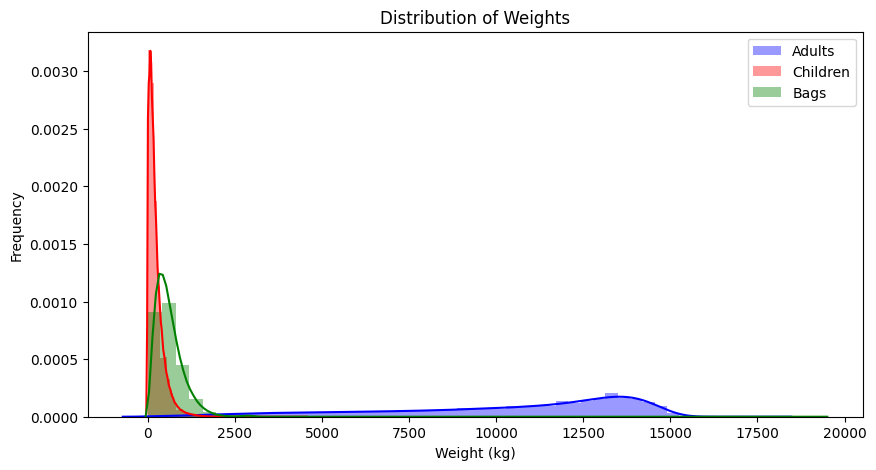

In [33]:
#Plot the distribution of the weights
plt.figure(figsize=(10,5))
sns.distplot(df['Adults_wt'], color='blue', label='Adults')
sns.distplot(df['Children_wt'], color='red', label='Children')
sns.distplot(df['Bags_wt'], color='green', label='Bags')

plt.legend()
plt.title('Distribution of Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

Adults account for most of the weight (including infants), followed by bags, and then children

In [14]:
#Split ScheduledRoute into Origin and Destination
df['Origin'] = df['ScheduledRoute'].str.split('-').str[0]
df['Destination'] = df['ScheduledRoute'].str.split('-').str[1]
df.head()

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,DepartureScheduled,...,DepartureYear,DepartureTime,DepartureTimeOfDay,DepartureDay_cat,DepartureMonth_cat,Adults_wt,Children_wt,Bags_wt,Origin,Destination
0,181142302,221,SPRZK,197.0,Max,Scheduled Flight,FR,Ryanair Sun,EMA-BUD,2022-01-24 09:55:00,...,2022,09:55:00,Morning,Weekend,Winter,9374.4,195.0,715.491333,EMA,BUD
1,178908306,3373,9HQEC,189.0,NG,Scheduled Flight,FR,Malta Air,TRN-MLA,2020-03-09 09:00:00,...,2020,09:00:00,Morning,Weekend,Spring,1506.6,0.0,116.585000,TRN,MLA
2,178886981,2814,9HQCN,189.0,NG,Scheduled Flight,FR,Malta Air,STN-CGN,2020-01-06 07:35:00,...,2020,07:35:00,Morning,Weekend,Winter,10546.2,162.5,315.716183,STN,CGN
3,180538798,6893,SPRKP,189.0,NG,Scheduled Flight,FR,Ryanair Sun,DTM-KTW,2020-12-11 07:15:00,...,2020,07:15:00,Morning,Weekend,Winter,7030.8,162.5,132.977778,DTM,KTW
4,178863684,2156,EIDWJ,189.0,NG,Scheduled Flight,FR,Ryanair DAC,BHX-AGP,2020-02-07 15:20:00,...,2020,15:20:00,Afternoon/Evening,Weekend,Winter,14647.5,65.0,782.251271,BHX,AGP


#### Calculating distance between airports using Haversine formula: https://openflights.org/data.html

In [15]:
#Import GlobalAirportDatabase.txt
airports = pd.read_csv('airports.csv', sep=',', header=None)
airports.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [16]:
#Keep columns 4,6,and 7: Rename to 'Airport', 'Latitude', and 'Longitude'
airports = airports[[4,6,7]]
airports.columns = ['Airport', 'Latitude', 'Longitude']

In [17]:
airports.head()

,Airport,Latitude,Longitude
0,GKA,-6.081690,145.391998
1,MAG,-5.207080,145.789001
2,HGU,-5.826790,144.296005
3,LAE,-6.569803,146.725977
4,POM,-9.443380,147.220001


In [18]:
#Calculate distance between Origin and Destination
#Use Haversine formula

#Convert Latitude and Longitude to radians
airports['Latitude'] = np.radians(airports['Latitude'])
airports['Longitude'] = np.radians(airports['Longitude'])

#Create dictionary of Latitude and Longitude
lat_dict = dict(zip(airports['Airport'], airports['Latitude']))
lon_dict = dict(zip(airports['Airport'], airports['Longitude']))

#Create new columns in df
df['Origin_Lat'] = df['Origin'].map(lat_dict)
df['Origin_Lon'] = df['Origin'].map(lon_dict)
df['Destination_Lat'] = df['Destination'].map(lat_dict)
df['Destination_Lon'] = df['Destination'].map(lon_dict)

#Calculate distance in km
df['Distance'] = 6371.01 * np.arccos(np.sin(df['Origin_Lat'])*np.sin(df['Destination_Lat']) + np.cos(df['Origin_Lat'])*np.cos(df['Destination_Lat'])*np.cos(df['Destination_Lon']-df['Origin_Lon']))

df.head()

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,DepartureScheduled,...,Adults_wt,Children_wt,Bags_wt,Origin,Destination,Origin_Lat,Origin_Lon,Destination_Lat,Destination_Lon,Distance
0,181142302,221,SPRZK,197.0,Max,Scheduled Flight,FR,Ryanair Sun,EMA-BUD,2022-01-24 09:55:00,...,9374.4,195.0,715.491333,EMA,BUD,0.922077,-0.023179,0.827805,0.336169,1578.757122
1,178908306,3373,9HQEC,189.0,NG,Scheduled Flight,FR,Malta Air,TRN-MLA,2020-03-09 09:00:00,...,1506.6,0.0,116.585000,TRN,MLA,0.788903,0.133511,0.625831,0.252680,1187.373797
2,178886981,2814,9HQCN,189.0,NG,Scheduled Flight,FR,Malta Air,STN-CGN,2020-01-06 07:35:00,...,10546.2,162.5,315.716183,STN,CGN,0.905564,0.004102,0.887777,0.124664,492.464988
3,180538798,6893,SPRKP,189.0,NG,Scheduled Flight,FR,Ryanair Sun,DTM-KTW,2020-12-11 07:15:00,...,7030.8,162.5,132.977778,DTM,KTW,0.899164,0.132859,0.880943,0.333009,810.037002
4,178863684,2156,EIDWJ,189.0,NG,Scheduled Flight,FR,Ryanair DAC,BHX-AGP,2020-02-07 15:20:00,...,14647.5,65.0,782.251271,BHX,AGP,0.915493,-0.030509,0.640098,-0.078524,1767.697155


In [19]:
#Remove unnecessary columns
df = df.drop(['ScheduledRoute', 'Origin_Lat', 'Origin_Lon', 'Destination_Lat', 'Destination_Lon'], axis=1)

In [20]:
#Examine missing values in Distance column by percentage
df['Distance'].isnull().sum()/len(df['Distance'])*100

1.7030040405835583

BlockTimeScheduled should be highly correlated to Distance

In [21]:
#Impute missing Distance values with mean according to BlockTimeScheduled
df['Distance'] = df.groupby('BlockTimeScheduled')['Distance'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
#Categorise Distance into Short Haul (<1500 kms), Medium Haul (1500-3000 kms), and Long Haul (>3000 kms)
df['Distance_cat'] = np.where(df['Distance']<1500, 'Short Haul', np.where(df['Distance']<3000, 'Medium Haul', 'Long Haul'))

In [23]:
#Categorise BlockTimeScheduled into <90 mins, 90-150 mins, >150 mins
df['BlockTime_cat'] = np.where(df['BlockTimeScheduled']<90, '<90', np.where(df['BlockTimeScheduled']<=150, '90-150', '>150'))

## Visualisations to understand the impact on TeledyneRampWeight

In [24]:
#Convert AircraftCapacity to int
df['AircraftCapacity'] = df['AircraftCapacity'].astype(int)

In [25]:
#Create Segment 1: AircraftType+Capacity
df['AircraftType+Capacity'] = df['AircraftTypeGroup'] + df['AircraftCapacity'].astype(str)

In [26]:
#Create Segment 2: DepartureYear+DepartureMonth_cat
df['DepartureYear+Season'] = df['DepartureYear'].astype(str) + ' ' + df['DepartureMonth_cat']

In [27]:
#Categorise departure year
df['DepartureYear_cat'] = np.where(df['DepartureYear']==2019, '2019-20', np.where(df['DepartureYear']==2020, '2019-20', np.where(df['DepartureYear']==2021, '2021-22', '2021-22')))

In [28]:
#Categorise 'DepartureYear+Season' into Peak Pandemic/Restricted Travel and Relaxed Travel Restrictions
df['DepartureYear_cat2'] = np.where(df['DepartureYear+Season'].isin(['2020 Spring', '2020 Summer', '2020 Autumn']), 'Peak Pandemic/Restricted Travel', 'Relaxed Travel Restrictions')

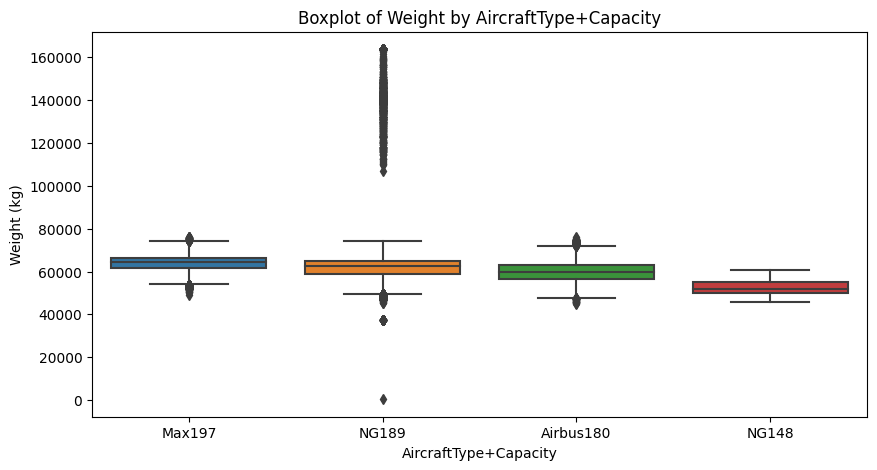

In [29]:
#Boxplot of target variable by AircraftType+Capacity
plt.figure(figsize=(10,5))
sns.boxplot(x='AircraftType+Capacity', y='TeledyneRampWeight', data=df)
plt.title('Boxplot of Weight by AircraftType+Capacity')
plt.xlabel('AircraftType+Capacity')
plt.ylabel('Weight (kg)')
plt.show()

The bulk of the outliers lie with NG aircrafts with a passenger capacity of 189...

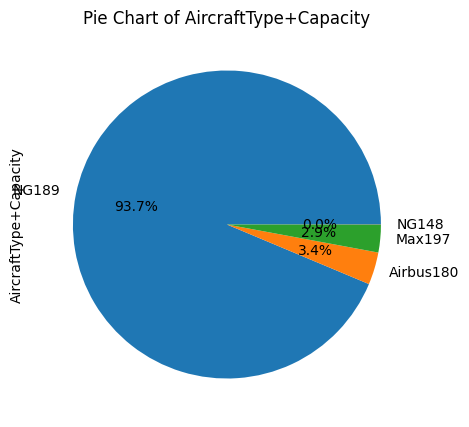

In [30]:
#Pie chart of AircraftType+Capacity
plt.figure(figsize=(10,5))
df['AircraftType+Capacity'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of AircraftType+Capacity')
plt.show()

...which makes sense as 93.7% of Ryanair's aircrafts are NG189

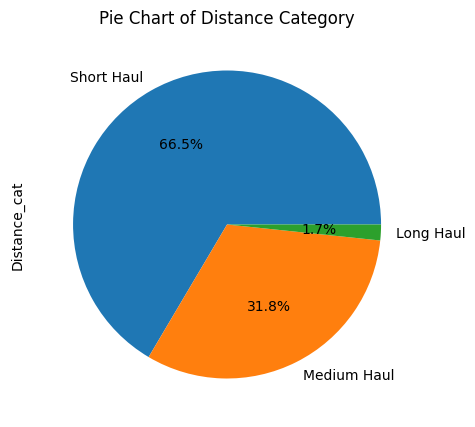

In [38]:
#Pie chart of Distance_cat
plt.figure(figsize=(10,5))
df['Distance_cat'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Distance Category')
plt.show()

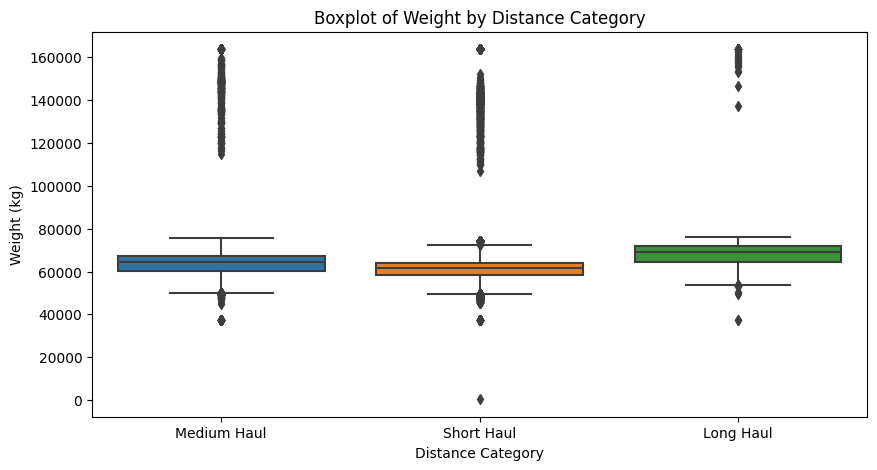

In [37]:
#Boxplot of target variable by Distance_cat
plt.figure(figsize=(10,5))
sns.boxplot(x='Distance_cat', y='TeledyneRampWeight', data=df)
plt.title('Boxplot of Weight by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Weight (kg)')
plt.show()

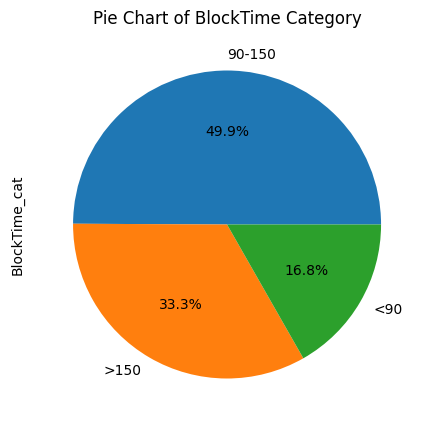

In [33]:
#Pie chart of BlockTime_cat
plt.figure(figsize=(10,5))
df['BlockTime_cat'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of BlockTime Category')
plt.show()

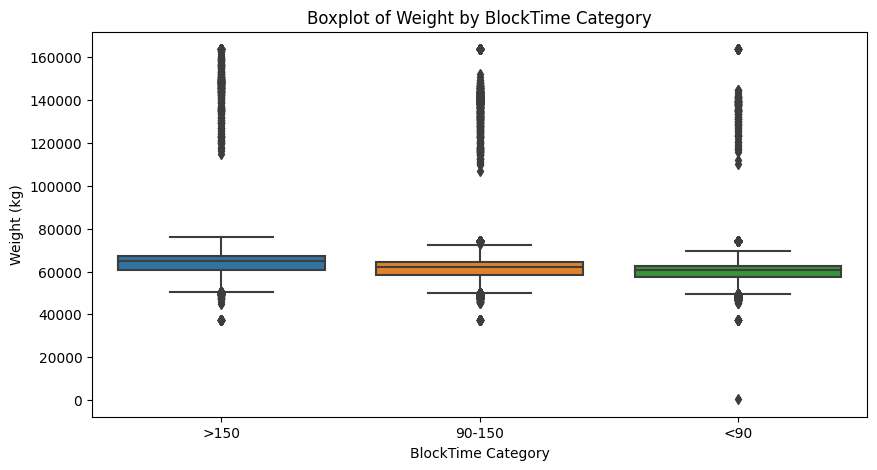

In [35]:
#Boxplot of target variable by BlockTime_cat
plt.figure(figsize=(10,5))
sns.boxplot(x='BlockTime_cat', y='TeledyneRampWeight', data=df)
plt.title('Boxplot of Weight by BlockTime Category')
plt.xlabel('BlockTime Category')
plt.ylabel('Weight (kg)')
plt.show()

Almost 50% of the flights have a block time between 90-150 mins

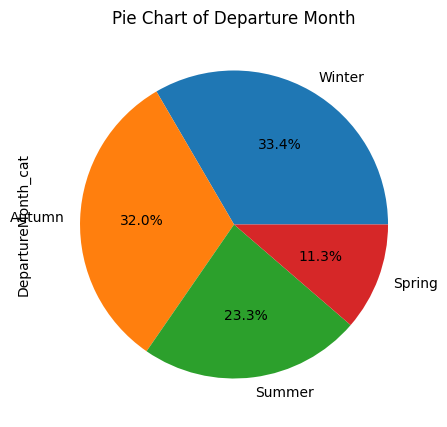

In [37]:
#Pie chart of DepartureMonth_cat
plt.figure(figsize=(10,5))
df['DepartureMonth_cat'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Departure Month')
plt.show()

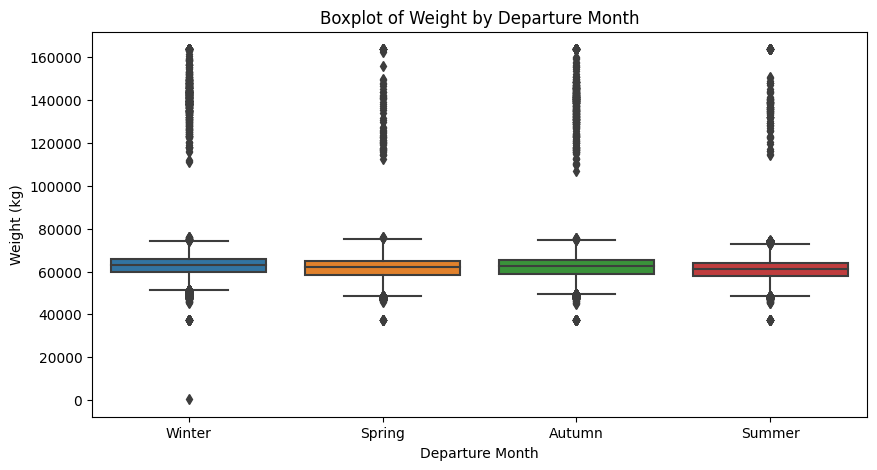

In [36]:
#Boxplot of target variable by DepartureMonth_cat
plt.figure(figsize=(10,5))
sns.boxplot(x='DepartureMonth_cat', y='TeledyneRampWeight', data=df)
plt.title('Boxplot of Weight by Departure Month')
plt.xlabel('Departure Month')
plt.ylabel('Weight (kg)')
plt.show()

It is interesting to note that a bulk of the flights are in Winter (expected, due to holiday season) and Autumn but not Summer

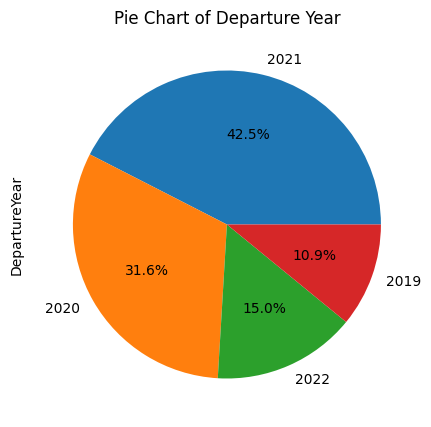

In [39]:
#Pie chart of DepartureYear
plt.figure(figsize=(10,5))
df['DepartureYear'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Departure Year')
plt.show()

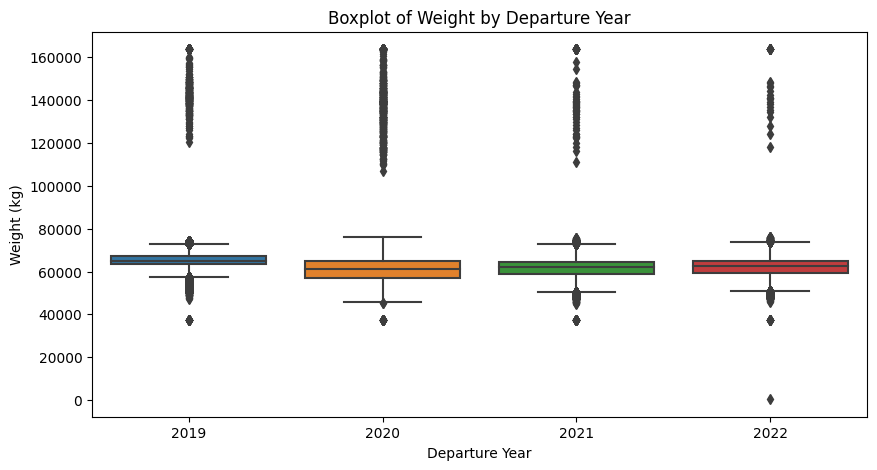

In [38]:
#Boxplot of target variable by DepartureYear
plt.figure(figsize=(10,5))
sns.boxplot(x='DepartureYear', y='TeledyneRampWeight', data=df)
plt.title('Boxplot of Weight by Departure Year')
plt.xlabel('Departure Year')
plt.ylabel('Weight (kg)')
plt.show()

The expectation would be to have higher flight operations in 2019 (pre-pandemic) and reduced flight operations in 2020 (peak pandemic). This, alongwith the data on seasonal travel, is leading us to believe that maybe the training data provided is not perfectly representing actual operations.

In [40]:
#Export to csv
df.to_csv('train_all.csv', index=False)

## Understanding TeledyneRampWeight outliers


In [41]:
df = pd.read_csv('train_all.csv')

/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/2960864730.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['DepartureYear']==2019]['TeledyneRampWeight'], label='2019')
/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/2960864730.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

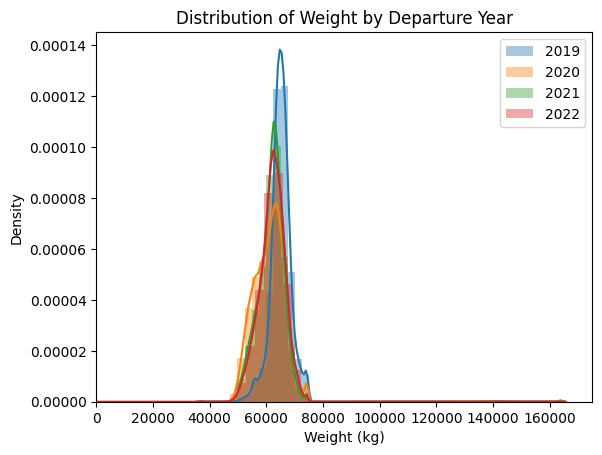

In [42]:
#Plot distribution of target variable by DepartureYear as subplots with same xaxis range
sns.distplot(df[df['DepartureYear']==2019]['TeledyneRampWeight'], label='2019')
sns.distplot(df[df['DepartureYear']==2020]['TeledyneRampWeight'], label='2020')
sns.distplot(df[df['DepartureYear']==2021]['TeledyneRampWeight'], label='2021')
sns.distplot(df[df['DepartureYear']==2022]['TeledyneRampWeight'], label='2022')
plt.title('Distribution of Weight by Departure Year')
plt.xlabel('Weight (kg)')
#Standardise xaxis range
plt.xlim(0, 175000)
plt.legend()
plt.show()

The distribution of TeledyneRampWeight by year is more aligned with how we'd expect airline operations pre- and off-peak pandemic

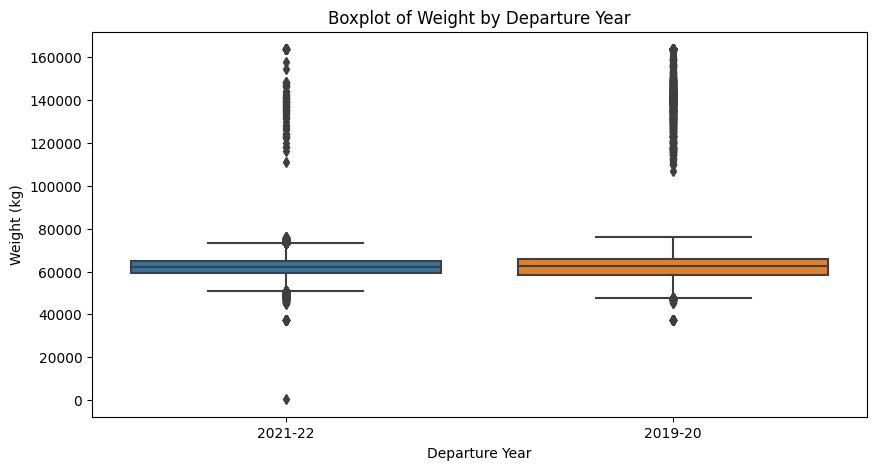

In [43]:
#Boxplot of target variable by DepartureYear_cat
plt.figure(figsize=(10,5))
sns.boxplot(x='DepartureYear_cat', y='TeledyneRampWeight', data=df)
plt.title('Boxplot of Weight by Departure Year')
plt.xlabel('Departure Year')
plt.ylabel('Weight (kg)')
plt.show()

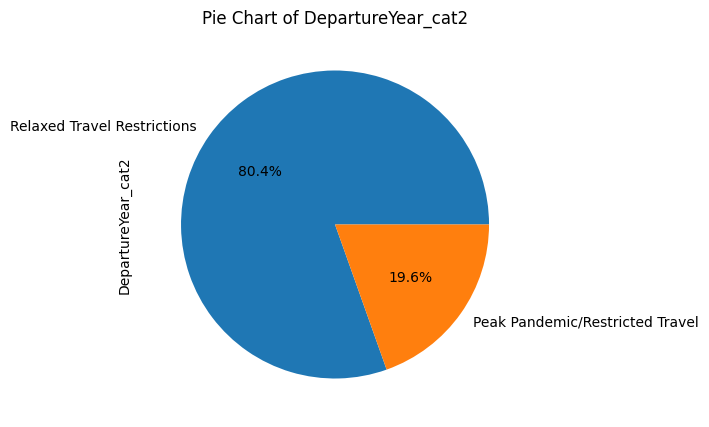

In [45]:
#Pie chart
plt.figure(figsize=(10,5))
df['DepartureYear_cat2'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of DepartureYear_cat2')
plt.show()

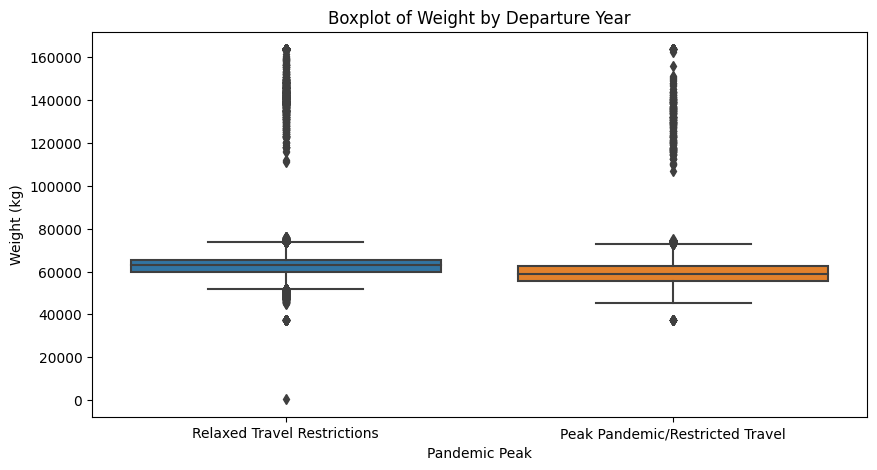

In [44]:
#Boxplot of target variable by DepartureYear_cat2
plt.figure(figsize=(10,5))
sns.boxplot(x='DepartureYear_cat2', y='TeledyneRampWeight', data=df)
plt.title('Boxplot of Weight by Departure Year')
plt.xlabel('Pandemic Peak')
plt.ylabel('Weight (kg)')
plt.show()

/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/3918808301.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['DepartureYear_cat2']=='Relaxed Travel Restrictions']['TeledyneRampWeight'], label='Relaxed Travel Restrictions')
/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/3918808301.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
h

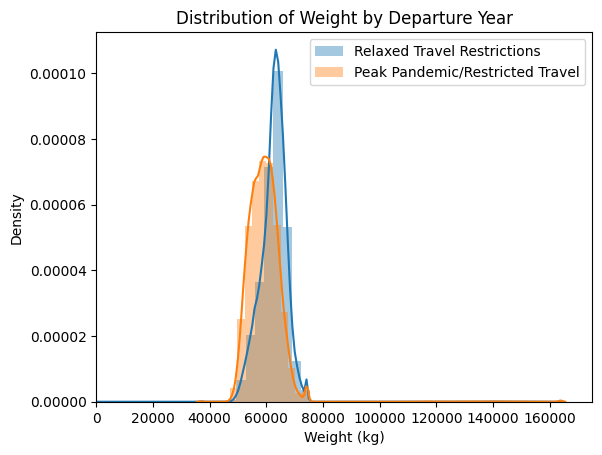

In [46]:
#Plot distribution of target variable by DepartureYear_cat2 
sns.distplot(df[df['DepartureYear_cat2']=='Relaxed Travel Restrictions']['TeledyneRampWeight'], label='Relaxed Travel Restrictions')
sns.distplot(df[df['DepartureYear_cat2']=='Peak Pandemic/Restricted Travel']['TeledyneRampWeight'], label='Peak Pandemic/Restricted Travel')

plt.title('Distribution of Weight by Departure Year')
plt.xlabel('Weight (kg)')
#Standardise xaxis range
plt.xlim(0, 175000)
plt.legend()
plt.show()

There seems to be a longer right tail for Peak Pandemic travel which lends credibility to our supposition that passenger flights during the time were used for other purposes such as transporting cargo or fuel

In [47]:
#Create segment: Segment1+DepartureYear_cat
df['Aircraft+DepartureYear'] = df['AircraftType+Capacity'] + ': ' + df['DepartureYear_cat']

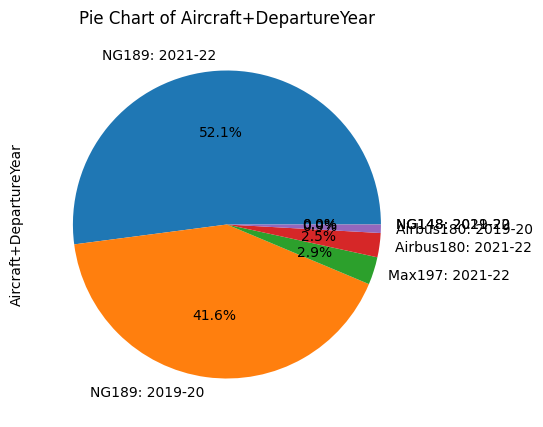

In [48]:
#Pie chart of Aircraft+DepartureYear
plt.figure(figsize=(10,5))
df['Aircraft+DepartureYear'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Aircraft+DepartureYear')
plt.show()

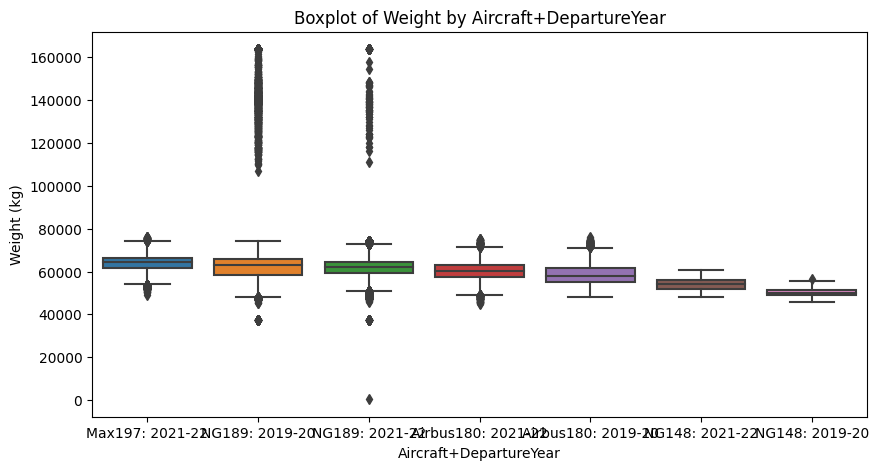

In [49]:
#Boxplot of target variable by Aircraft+DepartureYear
plt.figure(figsize=(10,5))
sns.boxplot(x='Aircraft+DepartureYear', y='TeledyneRampWeight', data=df)
plt.title('Boxplot of Weight by Aircraft+DepartureYear')
plt.xlabel('Aircraft+DepartureYear')
plt.ylabel('Weight (kg)')
plt.show()

/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/3882473641.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['AircraftType+Capacity']=='NG189') & (df['DepartureYear_cat']=='2019-20')]['TeledyneRampWeight'], label='NG189: 2019-20')
/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/3882473641.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, ple

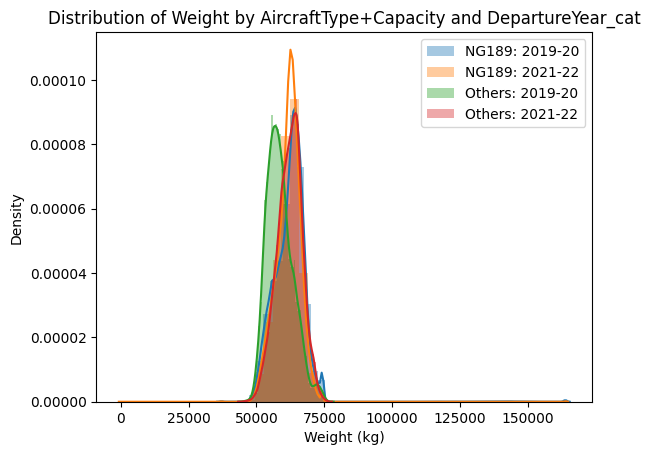

In [64]:
sns.distplot(df[(df['AircraftType+Capacity']=='NG189') & (df['DepartureYear_cat']=='2019-20')]['TeledyneRampWeight'], label='NG189: 2019-20')
sns.distplot(df[(df['AircraftType+Capacity']=='NG189') & (df['DepartureYear_cat']=='2021-22')]['TeledyneRampWeight'], label='NG189: 2021-22')
sns.distplot(df[(df['AircraftType+Capacity']!='NG189') & (df['DepartureYear_cat']=='2019-20')]['TeledyneRampWeight'], label='Others: 2019-20')
sns.distplot(df[(df['AircraftType+Capacity']!='NG189') & (df['DepartureYear_cat']=='2021-22')]['TeledyneRampWeight'], label='Others: 2021-22')
plt.title('Distribution of Weight by AircraftType+Capacity and DepartureYear_cat')
plt.xlabel('Weight (kg)')
plt.legend()
plt.show()

## Outlier Analysis

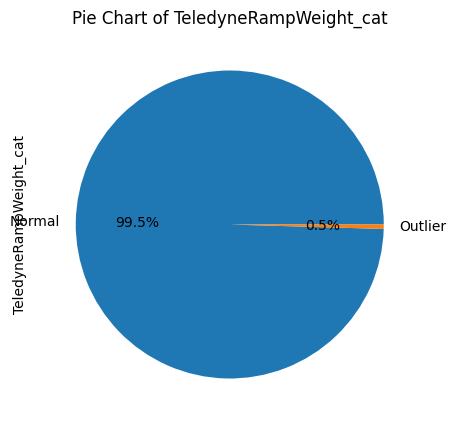

In [50]:
#Create category for TeledyneRampWeight to categorise outliers
df['TeledyneRampWeight_cat'] = np.where(df['TeledyneRampWeight']<df['TeledyneRampWeight'].quantile(0.25)-1.5*(df['TeledyneRampWeight'].quantile(0.75)-df['TeledyneRampWeight'].quantile(0.25)), 'Outlier', np.where(df['TeledyneRampWeight']>df['TeledyneRampWeight'].quantile(0.75)+1.5*(df['TeledyneRampWeight'].quantile(0.75)-df['TeledyneRampWeight'].quantile(0.25)), 'Outlier', 'Normal'))

#Pie chart of TeledyneRampWeight_cat
plt.figure(figsize=(10,5))
df['TeledyneRampWeight_cat'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of TeledyneRampWeight_cat')
plt.show()

/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/3782254961.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['TeledyneRampWeight_cat']=='Normal']['TeledyneRampWeight'], label='Normal')
/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/3782254961.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

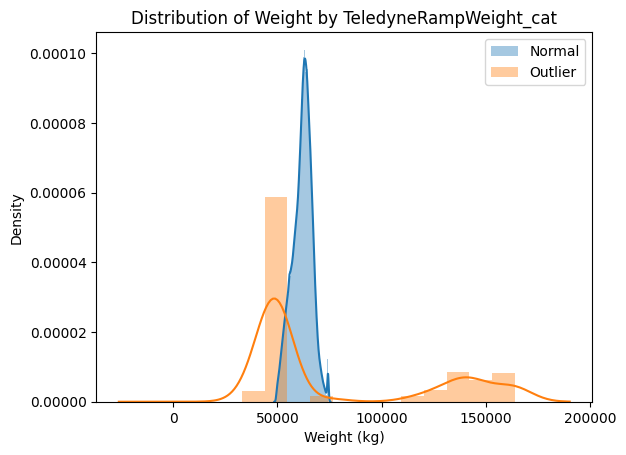

In [51]:
#Plot distribution of target variable by TeledyneRampWeight_cat
sns.distplot(df[df['TeledyneRampWeight_cat']=='Normal']['TeledyneRampWeight'], label='Normal')
sns.distplot(df[df['TeledyneRampWeight_cat']=='Outlier']['TeledyneRampWeight'], label='Outlier')
plt.title('Distribution of Weight by TeledyneRampWeight_cat')
plt.xlabel('Weight (kg)')
plt.legend()
plt.show()

Most of the outliers are just below 50000kg and concentrated between 10,000-16,000kg
This could be incorrect data or significant data. In any case, as our domain knowledge is not complete, we will go forth with the assumption that these outliers may exist due to unaccounted factors

## Visualisations to understand Outliers and their impact

In [52]:
#Segment df into df_normal and df_outlier
df_normal = df[df['TeledyneRampWeight_cat']=='Normal']
df_outlier = df[df['TeledyneRampWeight_cat']=='Outlier']

/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/3011074520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier['TotalPassengers_wt'] = df_outlier['Adults_wt'] + df_outlier['Children_wt']


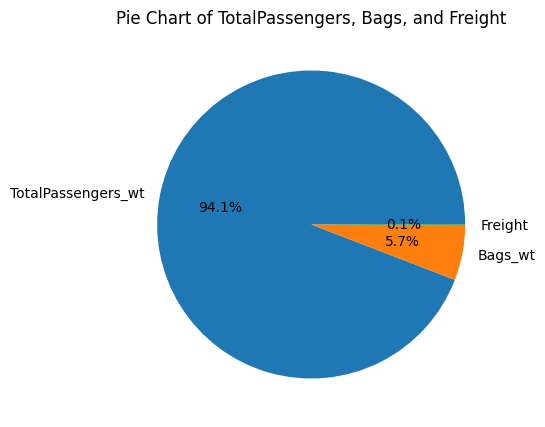

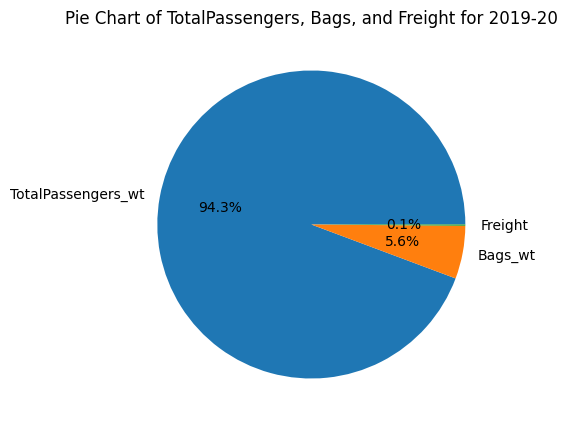

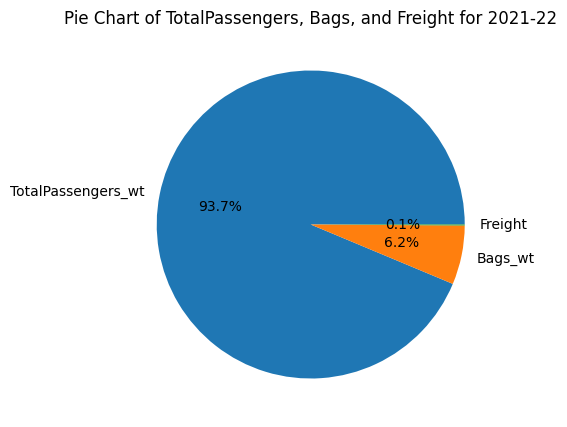

In [53]:
#Check for Total Passengers
df_outlier['TotalPassengers_wt'] = df_outlier['Adults_wt'] + df_outlier['Children_wt']

#Plot sum of TotalPassengers, Bags, and Freight as pie chart
plt.figure(figsize=(10,5))
df_outlier[['TotalPassengers_wt', 'Bags_wt', 'Freight']].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of TotalPassengers, Bags, and Freight')
plt.show()

#2019-20
plt.figure(figsize=(10,5))
df_outlier[df_outlier['DepartureYear_cat']=='2019-20'][['TotalPassengers_wt', 'Bags_wt', 'Freight']].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of TotalPassengers, Bags, and Freight for 2019-20')
plt.show()

#2021-22
plt.figure(figsize=(10,5))
df_outlier[df_outlier['DepartureYear_cat']=='2021-22'][['TotalPassengers_wt', 'Bags_wt', 'Freight']].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of TotalPassengers, Bags, and Freight for 2021-22')
plt.show()

/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/3022052443.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_outlier[df_outlier['DepartureYear_cat2']=='Relaxed Travel Restrictions']['TeledyneRampWeight'], label='Relaxed Travel Restrictions')
/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/3022052443.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functio

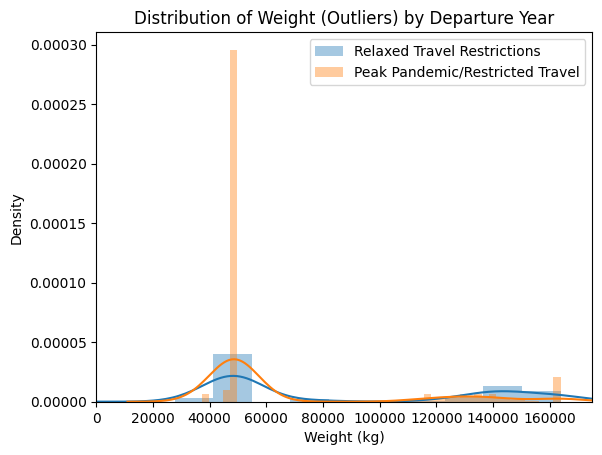

In [54]:
#Plot distribution of target variable by DepartureYear_cat2 
sns.distplot(df_outlier[df_outlier['DepartureYear_cat2']=='Relaxed Travel Restrictions']['TeledyneRampWeight'], label='Relaxed Travel Restrictions')
sns.distplot(df_outlier[df_outlier['DepartureYear_cat2']=='Peak Pandemic/Restricted Travel']['TeledyneRampWeight'], label='Peak Pandemic/Restricted Travel')

plt.title('Distribution of Weight (Outliers) by Departure Year')
plt.xlabel('Weight (kg)')
#Standardise xaxis range
plt.xlim(0, 175000)
plt.legend()
plt.show()

The outliers seem to occur more during peak pandemic season which makes sense as passenger flights may have been used to transport cargo/freight, fuel, etc. due to supply chain disruptions

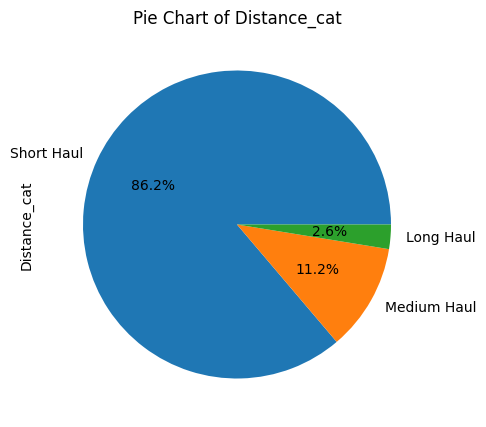

In [46]:
#Pie chart of Distance_cat
plt.figure(figsize=(10,5))
df_outlier['Distance_cat'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Distance_cat')
plt.show()

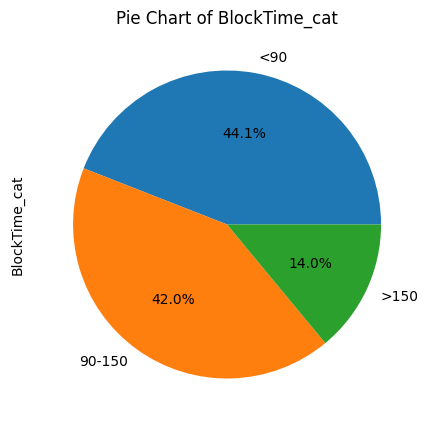

In [58]:
#Pie chart of Duration_cat
plt.figure(figsize=(10,5))
df_outlier['BlockTime_cat'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of BlockTime_cat')
plt.show()

/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/1987768532.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_outlier[df_outlier['AircraftType+Capacity']=='NG189']['TeledyneRampWeight'], label='NG189')
/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/1987768532.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mw

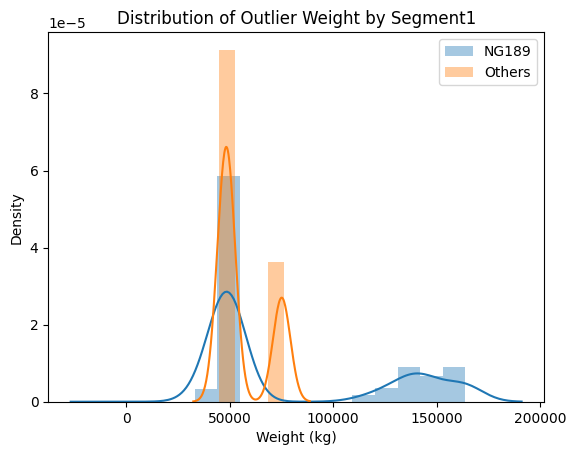

In [60]:
sns.distplot(df_outlier[df_outlier['AircraftType+Capacity']=='NG189']['TeledyneRampWeight'], label='NG189')
sns.distplot(df_outlier[df_outlier['AircraftType+Capacity']!='NG189']['TeledyneRampWeight'], label='Others')
plt.title('Distribution of Outlier Weight by Segment1')
plt.xlabel('Weight (kg)')
plt.legend()
plt.show()

The right tail of the outliers is mostly prevalent with NG189 crafts, as seen before

/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/1961853666.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_outlier[(df_outlier['AircraftType+Capacity']=='NG189') & (df_outlier['DepartureYear_cat']=='2019-20')]['TeledyneRampWeight'], label='NG189: 2019-20')
/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/1961853666.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to us

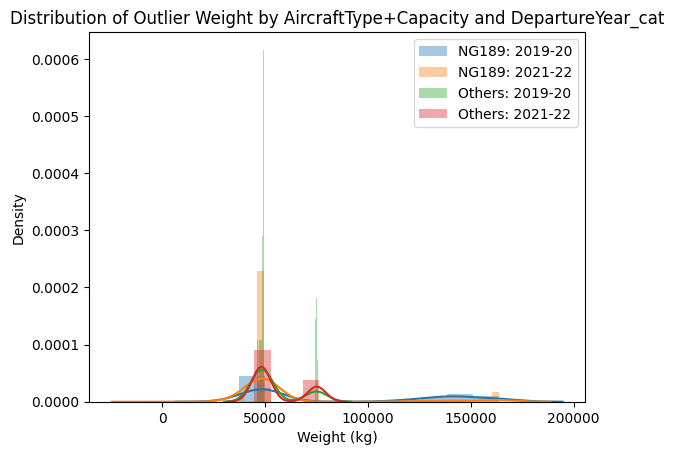

In [62]:
#Divide above plot by DepartureYear_cat
sns.distplot(df_outlier[(df_outlier['AircraftType+Capacity']=='NG189') & (df_outlier['DepartureYear_cat']=='2019-20')]['TeledyneRampWeight'], label='NG189: 2019-20')
sns.distplot(df_outlier[(df_outlier['AircraftType+Capacity']=='NG189') & (df_outlier['DepartureYear_cat']=='2021-22')]['TeledyneRampWeight'], label='NG189: 2021-22')
sns.distplot(df_outlier[(df_outlier['AircraftType+Capacity']!='NG189') & (df_outlier['DepartureYear_cat']=='2019-20')]['TeledyneRampWeight'], label='Others: 2019-20')
sns.distplot(df_outlier[(df_outlier['AircraftType+Capacity']!='NG189') & (df_outlier['DepartureYear_cat']=='2021-22')]['TeledyneRampWeight'], label='Others: 2021-22')
plt.title('Distribution of Outlier Weight by AircraftType+Capacity and DepartureYear_cat')
plt.xlabel('Weight (kg)')
plt.legend()
plt.show()


The departure year is not impacting outlier distribution for NG189

## Creating subsets

In [65]:
df.dtypes

FlightID                    int64
FlightNumber                int64
AircraftRegistration       object
AircraftCapacity            int64
AircraftTypeGroup          object
ServiceDescription         object
Carrier                    object
AOCDescription             object
DepartureScheduled         object
ArrivalScheduled           object
BlockTimeScheduled        float64
Adults                    float64
Children                  float64
Freight                   float64
Infants                   float64
Bags                      float64
TeledyneRampWeight        float64
DepartureDay                int64
DepartureMonth              int64
DepartureYear               int64
DepartureTime              object
DepartureTimeOfDay         object
DepartureDay_cat           object
DepartureMonth_cat         object
Adults_wt                 float64
Children_wt               float64
Bags_wt                   float64
Origin                     object
Destination                object
Distance      

In [66]:
#Final segments: 1. DepartureYear_cat: 2019-20 and 2020-21
#               2. AircraftType+Capacity: NG189 and Others

#Create subsets of df
df_2019_20 = df[df['DepartureYear_cat']=='2019-20']
df_2021_22 = df[df['DepartureYear_cat']=='2021-22']

df_NG189 = df[df['AircraftType+Capacity']=='NG189']
df_Others = df[df['AircraftType+Capacity']!='NG189']

df_2019_20.shape, df_2021_22.shape, df_NG189.shape, df_Others.shape

((325156, 38), (440080, 38), (716856, 38), (48380, 38))

In [67]:
#Export subsets to csv
df_2019_20.to_csv('train_2019_20.csv', index=False)
df_2021_22.to_csv('train_2021_22.csv', index=False)

df_NG189.to_csv('train_NG189.csv', index=False)
df_Others.to_csv('train_Others.csv', index=False)

In [68]:
#Final Segments: 3. Restricted Travel and Relaxed Travel Restrictions

df_restr = df[df['DepartureYear_cat2']=='Peak Pandemic/Restricted Travel']
df_relax = df[df['DepartureYear_cat2']!='Peak Pandemic/Restricted Travel']

df_restr.shape, df_relax.shape

((149690, 38), (615546, 38))

In [69]:
#Export subsets to csv
df_restr.to_csv('train_restr.csv', index=False)
df_relax.to_csv('train_relax.csv', index=False)

## Removing outliers from target variable

In [70]:
df = pd.read_csv('train_all.csv')

In [71]:
df['TeledyneRampWeight'].describe()

count    765236.000000
mean      61993.305010
std        5666.540433
min         360.000000
25%       58846.000000
50%       62437.000000
75%       65104.000000
max      163800.000000
Name: TeledyneRampWeight, dtype: float64

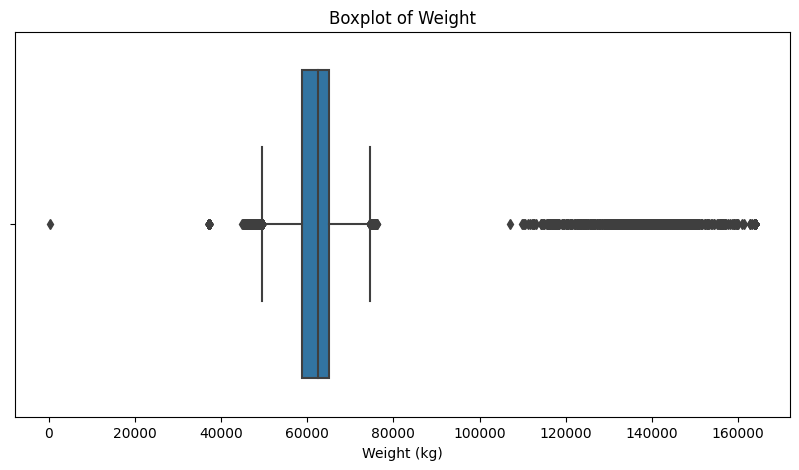

In [72]:
#Plot outliers of TeledyneRampWeight
plt.figure(figsize=(10,5))
sns.boxplot(x='TeledyneRampWeight', data=df)
plt.title('Boxplot of Weight')
plt.xlabel('Weight (kg)')
plt.show()

In [73]:
#Calculate percentage of outliers in TeledyneRampWeight less than first quartile - 1.5*IQR
len(df[df['TeledyneRampWeight']<df['TeledyneRampWeight'].quantile(0.25)-1.5*(df['TeledyneRampWeight'].quantile(0.75)-df['TeledyneRampWeight'].quantile(0.25))])/len(df)*100

0.3103617707478477

In [74]:
#Calculate percentage of outliers in TeledyneRampWeight greater than third quartile + 1.5*IQR
len(df[df['TeledyneRampWeight']>df['TeledyneRampWeight'].quantile(0.75)+1.5*(df['TeledyneRampWeight'].quantile(0.75)-df['TeledyneRampWeight'].quantile(0.25))])/len(df)*100

0.14910432859928177

In [75]:
#Remove outliers in TeledyneRampWeight
df = df[df['TeledyneRampWeight']<df['TeledyneRampWeight'].quantile(0.75)+1.5*(df['TeledyneRampWeight'].quantile(0.75)-df['TeledyneRampWeight'].quantile(0.25))]

df = df[df['TeledyneRampWeight']>df['TeledyneRampWeight'].quantile(0.25)-1.5*(df['TeledyneRampWeight'].quantile(0.75)-df['TeledyneRampWeight'].quantile(0.25))]

/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/4281315937.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TeledyneRampWeight'])


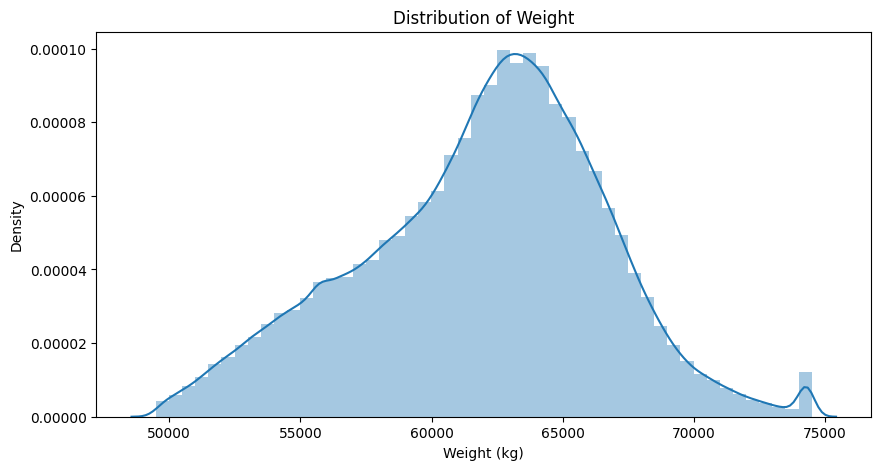

In [76]:
#Plot distribution of TeledyneRampWeight
plt.figure(figsize=(10,5))
sns.distplot(df['TeledyneRampWeight'])
plt.title('Distribution of Weight')
plt.xlabel('Weight (kg)')
plt.show()

In [77]:
#Save to csv
df.to_csv('train_all_nooutl.csv', index=False)

# Annex

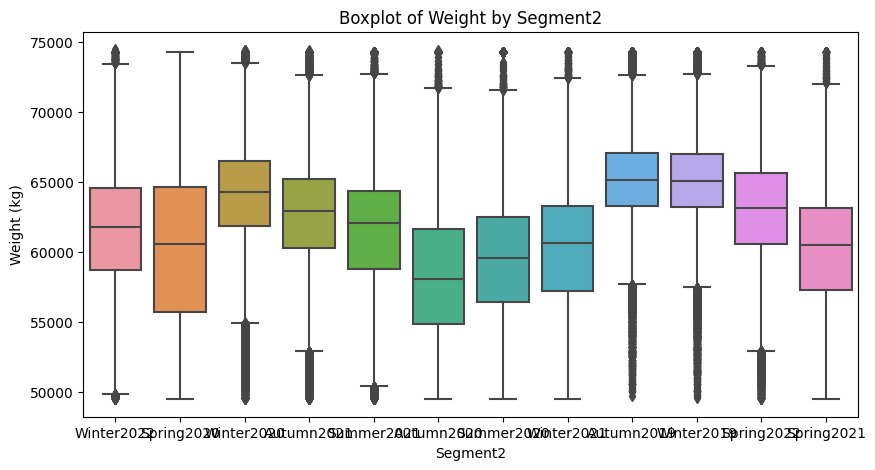

In [78]:
#Create Segment2: DepartureMonth_cat+DepartureYear
df['Segment2'] = df['DepartureMonth_cat'] + df['DepartureYear'].astype(str)

#Boxplot of target variable by Segment2
plt.figure(figsize=(10,5))
sns.boxplot(x='Segment2', y='TeledyneRampWeight', data=df)
plt.title('Boxplot of Weight by Segment2')
plt.xlabel('Segment2')
plt.ylabel('Weight (kg)')
plt.show()

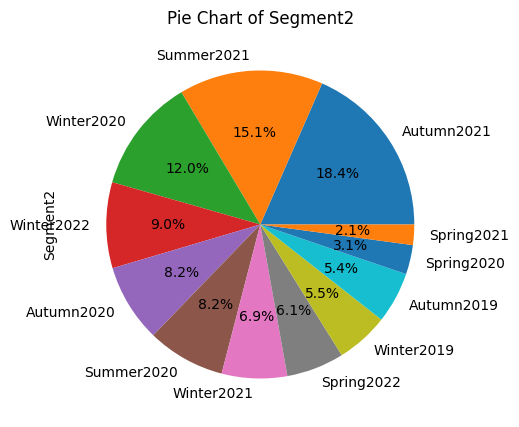

In [79]:
#Pie chart of Segment2
plt.figure(figsize=(10,5))
df['Segment2'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Segment2')
plt.show()

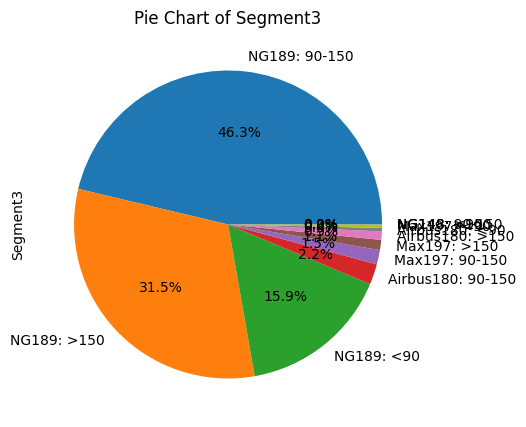

In [82]:
#Segment3: Segment1+Duration_cat
df['Segment3'] = df['AircraftType+Capacity'] + ': ' + df['BlockTime_cat']

#Pie chart of Segment3
plt.figure(figsize=(10,5))
df['Segment3'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Segment3')
plt.show()

In [94]:
#Calculate percentage of outliers in TeledyneRampWeight greater than third quartile + 1.5*IQR
len(df[df['TeledyneRampWeight']>df['TeledyneRampWeight'].quantile(0.75)+1.5*(df['TeledyneRampWeight'].quantile(0.75)-df['TeledyneRampWeight'].quantile(0.25))])/len(df)*100

0.0

In [95]:
#Remove outliers in TeledyneRampWeight
df = df[df['TeledyneRampWeight']<df['TeledyneRampWeight'].quantile(0.75)+1.5*(df['TeledyneRampWeight'].quantile(0.75)-df['TeledyneRampWeight'].quantile(0.25))]

df = df[df['TeledyneRampWeight']>df['TeledyneRampWeight'].quantile(0.25)-1.5*(df['TeledyneRampWeight'].quantile(0.75)-df['TeledyneRampWeight'].quantile(0.25))]

/var/folders/cn/_mrcycqd6xvdxldvbqpdt4hr0000gn/T/ipykernel_36014/4281315937.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TeledyneRampWeight'])


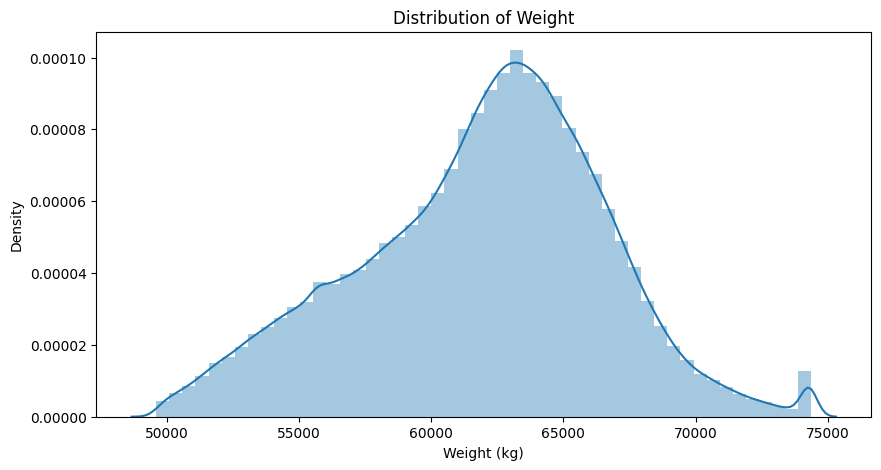

In [96]:
#Plot distribution of TeledyneRampWeight
plt.figure(figsize=(10,5))
sns.distplot(df['TeledyneRampWeight'])
plt.title('Distribution of Weight')
plt.xlabel('Weight (kg)')
plt.show()

In [97]:
#Save to csv
df.to_csv('train_all_nonull.csv', index=False)

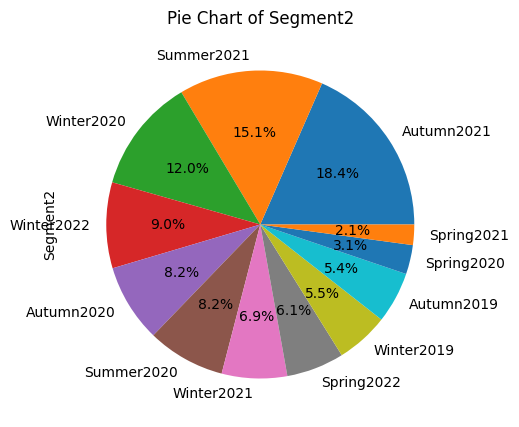

In [99]:
#Pie chart of Segment2
plt.figure(figsize=(10,5))
df['Segment2'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Segment2')
plt.show()